In [1]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

In [2]:
import importlib
import sys
sys.path.append('../')
from Utils.perturbationsnew import RBPIndividual,RBPIndividualNew1,  RBPIndividualNew2, zeroPerturb, noisePerturb, blurPerturb
from Utils.models import *
from Utils.data import perturb, generateSynthetic, generateSyntheticPerturbReal,ReadTS

print(sys.path)


['/Users/gali/anaconda3/envs/LIMEtf/lib/python310.zip', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/lib-dynload', '', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/site-packages', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/site-packages/setuptools/_vendor', '../', '../']


def RBPIndividualNew1(global_signals, original_signal, index0, index1):
    xrec = multisamplebackgroundIdentification(global_signals)
    raw_signal = original_signal.copy()
    raw_slice = raw_signal[index0:index1]
    xrec_slice = xrec[index0:index1]
    raw_range = raw_slice.max() - raw_slice.min()
    xrec_range = xrec_slice.max() - xrec_slice.min()

    if raw_range > 0 and xrec_range > 0:
        range_ratio = raw_range / xrec_range

    if range_ratio > 10:
        print('triggered')
        scale_factor = range_ratio / 10
        xrec[index0:index1] *= scale_factor

    raw_signal[index0:index1] = xrec[index0:index1]
    return raw_signal

In [3]:
from IPython.display import display, HTML

# 设置默认输出折叠
display(HTML('''
<style>
.output {
    display: flex;
    flex-direction: column;
}
.output_scroll {
    max-height: 300px; 
    overflow-y: auto;
}
</style>
'''))


## Test important content removal (accuracy decrease)

### Load synthetic dataset and train CNN model 

In [4]:
x_train, y_train,x_test_original, y_test_original = ReadTS('Computers')
y_train = y_train - 1
y_test_original = y_test_original - 1
print(x_train.shape)
print(y_train)

(250, 720, 1)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
from sklearn.preprocessing import StandardScaler
def normalize(TS):

    original_shape = TS.shape
    

    TS_2d = TS.reshape(original_shape[0] , original_shape[1])
    

    scaler = StandardScaler()
    

    TS_normalized = scaler.fit_transform(TS_2d)

    
    TS = TS_normalized.reshape(original_shape)
    
    return TS

x_train = normalize(x_train)
x_test_original = normalize(x_test_original)

In [6]:
model = make_CNN_model(x_train.shape[1:],num_classes = 2)
trained_model, history = train_CNN_model(model, x_train, y_train, epochs=200, batch_size=32)

Epoch 1/200


2024-11-27 21:25:20.902791: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 1s 46ms/step - loss: 0.6053 - sparse_categorical_accuracy: 0.5850 - val_loss: 0.7582 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/200
7/7 [==============================] - 0s 30ms/step - loss: 0.5573 - sparse_categorical_accuracy: 0.6350 - val_loss: 0.7676 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/200
7/7 [==============================] - 0s 39ms/step - loss: 0.5379 - sparse_categorical_accuracy: 0.7100 - val_loss: 0.7350 - val_sparse_categorical_accuracy: 0.0600
Epoch 4/200
7/7 [==============================] - 0s 31ms/step - loss: 0.5258 - sparse_categorical_accuracy: 0.7400 - val_loss: 0.6942 - val_sparse_categorical_accuracy: 0.7600
Epoch 5/200
7/7 [==============================] - 0s 35ms/step - loss: 0.5128 - sparse_categorical_accuracy: 0.7550 - val_loss: 0.6890 - val_sparse_categorical_accuracy: 0.7400
Epoch 6/200
7/7 [==============================] - 0s 36ms/step - loss: 0.4986 - sparse_categorical_accuracy: 0.79

In [7]:
test_loss, test_acc = trained_model.evaluate(x_test_original, y_test_original)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

8/8 [==============================] - 0s 8ms/step - loss: 0.8057 - sparse_categorical_accuracy: 0.7400
Test accuracy 0.7400000095367432
Test loss 0.8056758642196655


### Create perturbed test sets and calculate decrease in accuracy

In [8]:
print(y_test_original.shape)

(250,)


In [9]:
print(inspect.getsource(perturb))
print(inspect.signature(perturb))

def perturb(perturbation_strategy, ts, index0, index1, global_ts = []):
    if perturbation_strategy == 'RBP':
        return RBPIndividual(ts, index0, index1)
    if perturbation_strategy == 'zero':
        return zeroPerturb(ts, index0, index1)
    if perturbation_strategy == 'noise':
        return noisePerturb(ts, index0, index1)
    if perturbation_strategy == 'blur':
        return blurPerturb(ts, index0, index1)
    if perturbation_strategy == 'RBP1':
        return RBPIndividualNew1(global_ts, ts, index0, index1)    
    if perturbation_strategy == 'RBP2':
        return RBPIndividualNew2(global_ts, ts, index0, index1)    

(perturbation_strategy, ts, index0, index1, global_ts=[])


In [19]:
predictions_original = model.predict(x_test_original)
perturb_test_set = x_test_original.copy()
perturb_test_set = perturb_test_set.reshape(x_test_original.shape[0:2])
index_0 = 600
index_1 = 700
x_test_rbp = np.asarray([perturb('RBP',x,index_0,index_1) for x in perturb_test_set])
x_test_rbp = np.expand_dims(x_test_rbp, axis=-1)
predictions_rbp = model.predict(x_test_rbp)

pert1 = perturb('RBP1',perturb_test_set[0],index_0,index_1, global_ts = perturb_test_set)
x_test_new1 = np.asarray([perturb('RBP1',x,index_0,index_1, global_ts = perturb_test_set) for x in perturb_test_set])
x_test_new1 = np.expand_dims(x_test_new1, axis=-1)
predictions_new1 = model.predict(x_test_new1)

#x_test_new2 = np.asarray([perturb('RBP2',x,400,500, global_ts = perturb_test_set) for x in perturb_test_set])
#x_test_new2 = np.expand_dims(x_test_new2, axis=-1)
#predictions_new2 = model.predict(x_test_new2)

x_test_zero = np.asarray([perturb('zero',x,index_0,index_1) for x in perturb_test_set])
x_test_zero = np.expand_dims(x_test_zero, axis=-1)
predictions_zero = model.predict(x_test_zero)

x_test_noise = np.asarray([perturb('noise',x,index_0,index_1) for x in perturb_test_set])
x_test_noise = np.expand_dims(x_test_noise, axis=-1)
predictions_noise = model.predict(x_test_noise)

x_test_blur = np.asarray([perturb('blur',x,index_0,index_1) for x in perturb_test_set])
x_test_blur = np.expand_dims(x_test_blur, axis=-1)
predictions_blur = model.predict(x_test_blur)

8/8 [==============================] - 0s 6ms/step


In [20]:
def l2norm(perturb):
    # 计算两个数组之间的差
    difference = perturb - x_test_original
    
    # 计算差的平方
    squared_difference = np.square(difference)
    
    # 计算平方和，沿着特征维度（axis=1），因为每个时间序列样本是一行
    sum_of_squares = np.sum(squared_difference, axis=1)
    
    # 计算平方和的平方根，即l2范数
    l2_norms = np.sqrt(sum_of_squares)
    
    average_l2_norm = np.mean(l2_norms)
    
    # l2_norms现在是一个形状为(467,)的数组，其中每个元素代表
    # 对应时间序列样本之间的l2范数
    print(average_l2_norm)  # 输出: (467,)

l2norm(x_test_rbp)
l2norm(x_test_new1)
l2norm(x_test_zero)
l2norm(x_test_noise)
l2norm(x_test_blur)

6.8039626595404386
8.835510407107503
8.819603112798209
24.09669010027616
1.2836415351900614


In [21]:
def accuracy(predictions, labels):
    hits = 0
    for i in range(0,len(predictions)):
        if predictions[i] == labels[i]:
            hits += 1
    return hits/len(predictions)

In [22]:
original_accuracy = accuracy(np.argmax(predictions_original,axis=1), y_test_original)
rbp_accuracy = accuracy(np.argmax(predictions_rbp,axis=1), y_test_original)
new1_accuracy = accuracy(np.argmax(predictions_new1,axis=1), y_test_original)
#new2_accuracy = accuracy(np.argmax(predictions_new2,axis=1), y_test_original)
zero_accuracy = accuracy(np.argmax(predictions_zero,axis=1), y_test_original)
noise_accuracy = accuracy(np.argmax(predictions_noise,axis=1), y_test_original)
blur_accuracy = accuracy(np.argmax(predictions_blur,axis=1), y_test_original)

In [23]:
print(" Original Accuracy: " + str(original_accuracy) + "\n"+
    " RBP Accuracy: " + str(rbp_accuracy) + "\n"+
    " RBP1 Accuracy: " + str(new1_accuracy) + "\n"+
    #" RBP2 Accuracy: " + str(new2_accuracy) + "\n"+
      
    " Zero Accuracy: " + str(zero_accuracy) + "\n"+
    " Noise Accuracy: " + str(noise_accuracy) + "\n"+
    " Blur Accuracy: " + str(blur_accuracy) + "\n")

 Original Accuracy: 0.74
 RBP Accuracy: 0.696
 RBP1 Accuracy: 0.688
 Zero Accuracy: 0.684
 Noise Accuracy: 0.572
 Blur Accuracy: 0.744



In [24]:
print(np.argmax(predictions_noise,axis=1))
print(np.argmax(predictions_new1,axis=1))

[0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0
 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1]
[0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

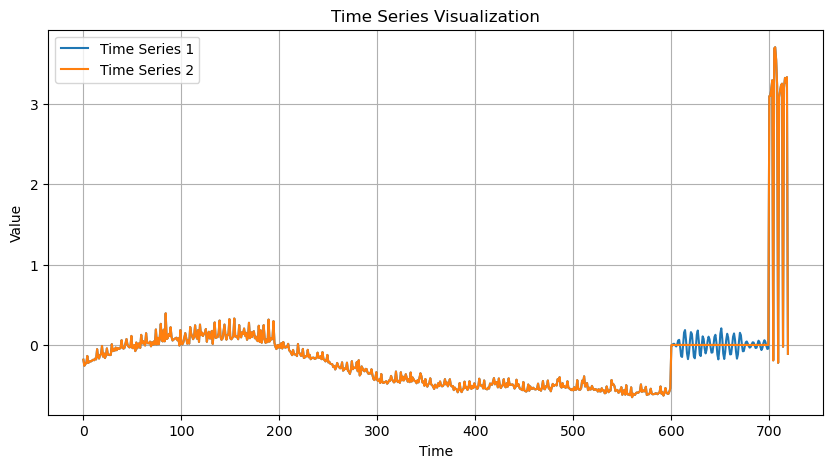

In [26]:
import numpy as np
import matplotlib.pyplot as plt

new1 = x_test_new1[4]
orig = x_test_zero[4]

# 创建一个时间轴，对应于时间序列的索引
time_axis = np.arange(len(new1))

# 使用matplotlib绘制时间序列
plt.figure(figsize=(10, 5))  # 设置图形的大小
plt.plot(time_axis, new1, label='Time Series 1')  # 绘制第一个时间序列
plt.plot(time_axis, orig, label='Time Series 2')  # 绘制第二个时间序列

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Time Series Visualization')
plt.xlabel('Time')
plt.ylabel('Value')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

In [17]:
print(new1)

[[-1.83889315e-01]
 [-2.59020041e-01]
 [-2.32210848e-01]
 [-2.28728164e-01]
 [-1.37062466e-01]
 [-2.22970250e-01]
 [-2.13127886e-01]
 [-2.01023445e-01]
 [-2.03446149e-01]
 [-1.92250115e-01]
 [-1.83957289e-01]
 [-1.90573909e-01]
 [-1.69224855e-01]
 [-1.79742873e-01]
 [-5.23614336e-02]
 [-1.44356230e-01]
 [-1.68948560e-01]
 [-1.24636003e-01]
 [-1.15855850e-01]
 [-1.23381489e-02]
 [-1.45322321e-01]
 [-1.04953775e-01]
 [-1.63238520e-01]
 [-1.33707382e-01]
 [-4.28915612e-02]
 [-1.21629403e-01]
 [-1.19411870e-01]
 [-1.26454354e-01]
 [-1.24234385e-01]
 [ 9.83227201e-03]
 [-7.74668119e-02]
 [-5.50339541e-02]
 [-7.10519866e-02]
 [-3.19877528e-02]
 [-6.53931198e-02]
 [-3.74751993e-02]
 [-4.95255981e-02]
 [-4.63343249e-02]
 [-3.40138436e-02]
 [ 5.91708541e-02]
 [-3.69111274e-02]
 [-4.53053837e-02]
 [-3.58791232e-02]
 [ 2.07144989e-02]
 [ 7.38327092e-02]
 [ 3.07635705e-03]
 [-1.85333303e-02]
 [-3.02184834e-02]
 [-2.45370590e-02]
 [ 1.12261003e-01]
 [-3.86895104e-02]
 [-3.99764200e-02]
 [-6.0339528